In [3]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\mryad\\Downloads\\Amazon Sale Report.csv"
df= pd.read_csv(file_path, encoding='ISO-8859-1')

# Drop columns with excessive missing values
df_cleaned = df.drop(columns=['New', 'PendingS'])

# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'],format='mixed')

# Handle missing values in 'currency' and 'Amount' columns
# Assuming that missing values in 'currency' and 'Amount' are related to cancelled orders
df_cleaned['currency'] = df_cleaned['currency'].fillna('INR')
df_cleaned['Amount'] = df_cleaned['Amount'].fillna(0)

# Handle missing values in shipping-related columns by filling with a placeholder or removing rows
df_cleaned['ship-city'] = df_cleaned['ship-city'].fillna('Unknown')
df_cleaned['ship-state'] = df_cleaned['ship-state'].fillna('Unknown')
df_cleaned['ship-postal-code'] = df_cleaned['ship-postal-code'].fillna(0)
df_cleaned['ship-country'] = df_cleaned['ship-country'].fillna('Unknown')

# Handle missing values in 'fulfilled-by' column by filling with a placeholder
df_cleaned['fulfilled-by'] = df_cleaned['fulfilled-by'].fillna('Unknown')

# Display the first few rows to confirm changes
print(df_cleaned.head())

# Optionally, save the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_amazon_sales_report.csv', index=False)


   index             Order ID       Date                        Status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   Qty currency  Amount    ship-city   ship-state  ship-postal-code  \
0    0   

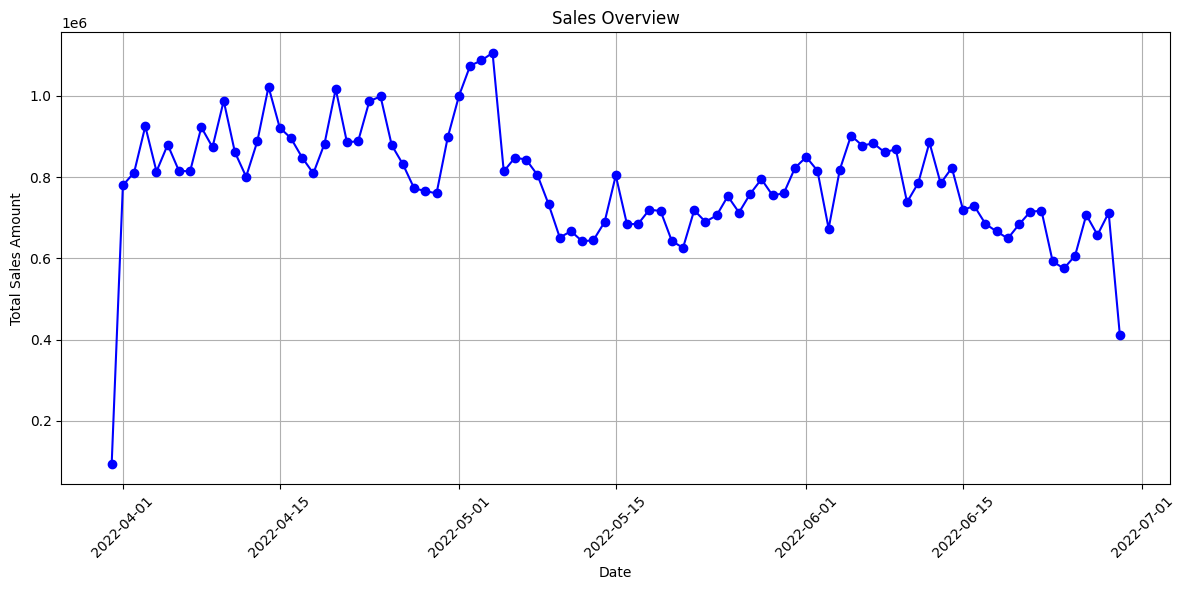

In [7]:
# Filter out cancelled orders
df_cleaned = df_cleaned[df_cleaned['Status'] != 'Cancelled']

# Group by date and calculate total sales amount
sales_over_time = df_cleaned.groupby('Date')['Amount'].sum().reset_index()

# Plot the sales overview graph
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Amount'], marker='o', linestyle='-', color='b')
plt.title('Sales Overview')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\mryad\AppData\Local\Temp\ipykernel_30172\140327148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_distribution.index, y=product_category_distribution.values, palette='viridis')


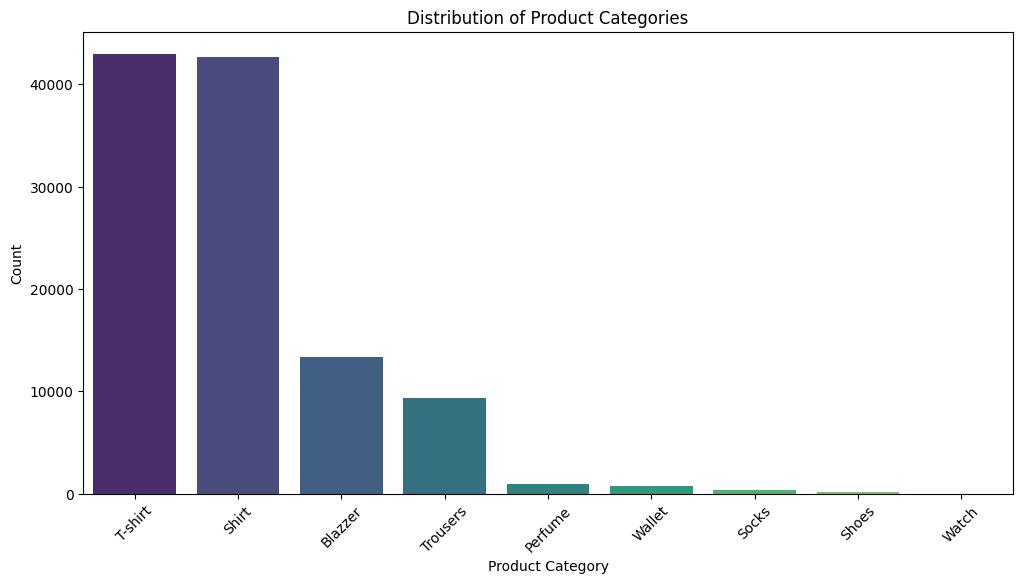

C:\Users\mryad\AppData\Local\Temp\ipykernel_30172\140327148.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling_products.index, y=top_selling_products.values, palette='viridis')


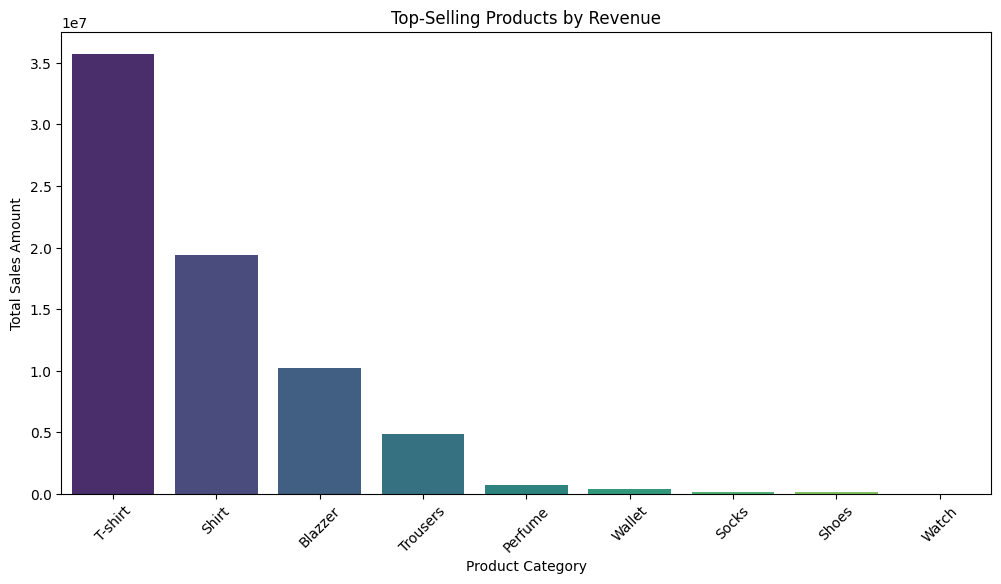

In [8]:
import seaborn as sns

# Distribution of Product Categories
product_category_distribution = df_cleaned['Category'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=product_category_distribution.index, y=product_category_distribution.values, palette='viridis')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top-Selling Products
top_selling_products = df_cleaned.groupby('Category')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_products.index, y=top_selling_products.values, palette='viridis')
plt.title('Top-Selling Products by Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


C:\Users\mryad\AppData\Local\Temp\ipykernel_30172\408673944.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fulfillment_methods_distribution.index, y=fulfillment_methods_distribution.values, palette='viridis')


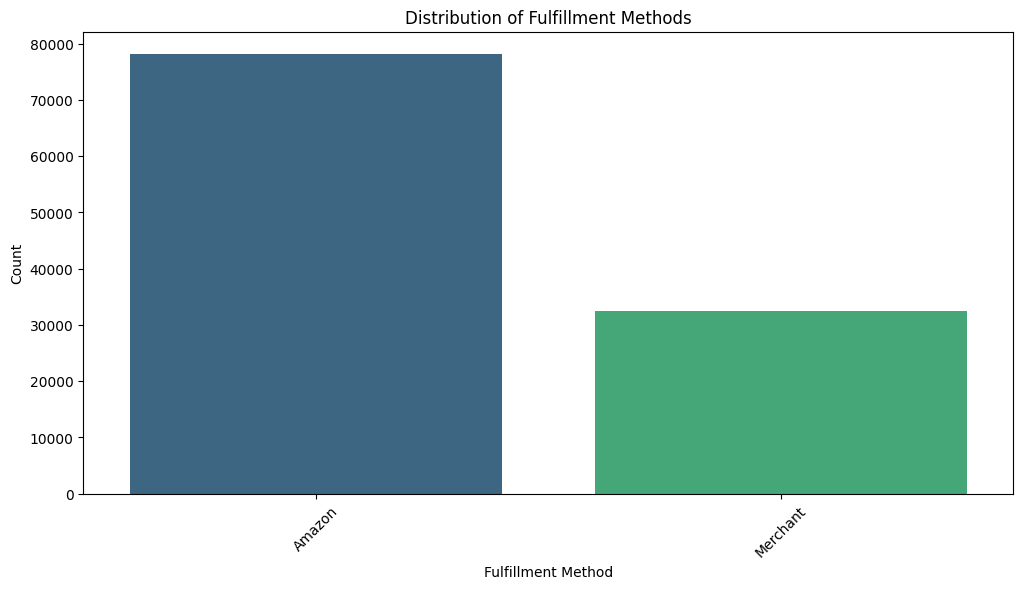

C:\Users\mryad\AppData\Local\Temp\ipykernel_30172\408673944.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fulfillment_success_rate.index, y=fulfillment_success_rate.values, palette='viridis')


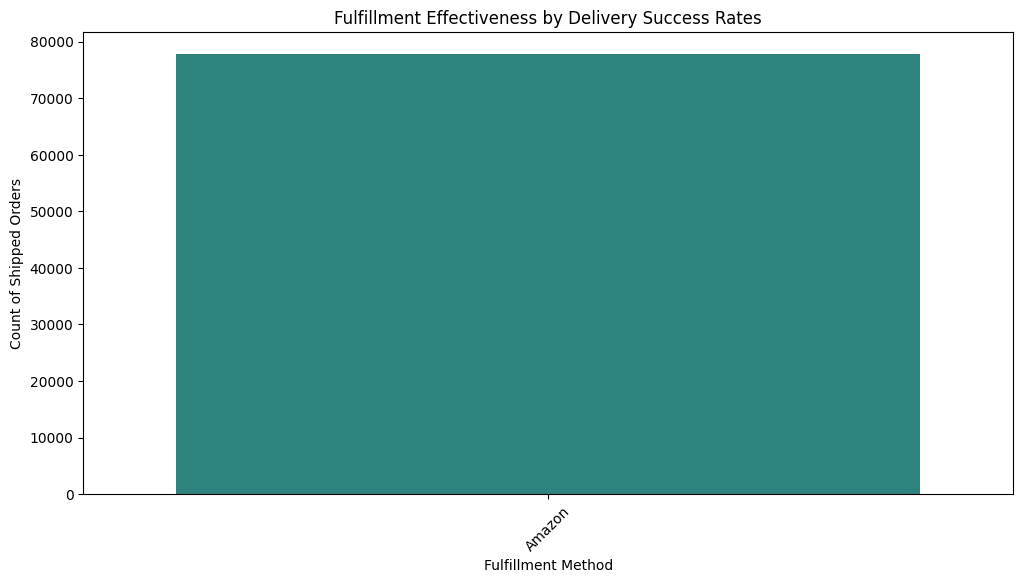

In [10]:

# Fulfillment Methods Distribution
fulfillment_methods_distribution = df_cleaned['Fulfilment'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=fulfillment_methods_distribution.index, y=fulfillment_methods_distribution.values, palette='viridis')
plt.title('Distribution of Fulfillment Methods')
plt.xlabel('Fulfillment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Fulfillment Effectiveness (Delivery Success Rates)
fulfillment_success_rate = df_cleaned[df_cleaned['Status'] == 'Shipped']['Fulfilment'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=fulfillment_success_rate.index, y=fulfillment_success_rate.values, palette='viridis')
plt.title('Fulfillment Effectiveness by Delivery Success Rates')
plt.xlabel('Fulfillment Method')
plt.ylabel('Count of Shipped Orders')
plt.xticks(rotation=45)
plt.show()


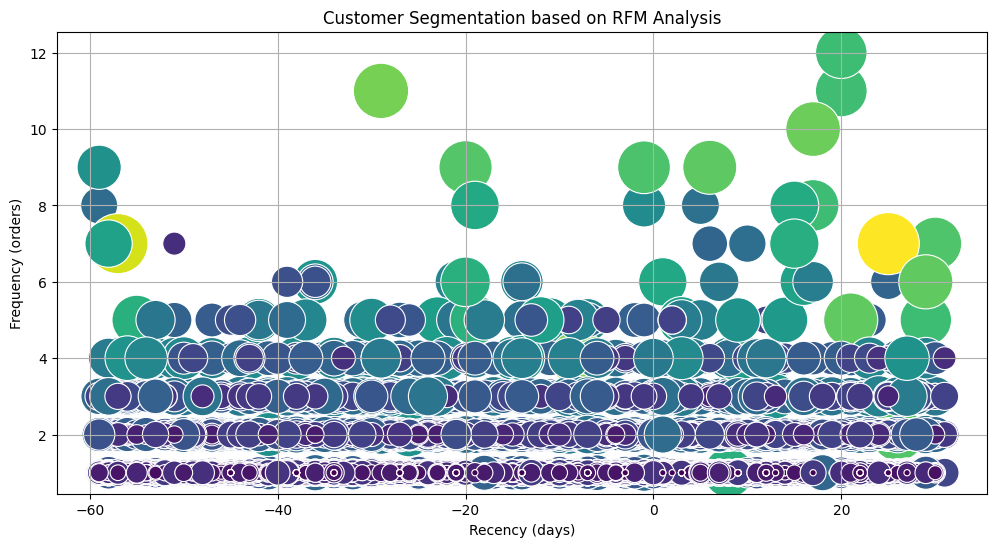

In [11]:
# RFM Analysis
import datetime as dt

# Current date for reference
current_date = dt.datetime(2022, 5, 1)

# Create RFM Table
rfm_table = df_cleaned.groupby('Order ID').agg({
    'Date': lambda x: (current_date - x.max()).days,
    'Order ID': 'count',
    'Amount': 'sum'
}).rename(columns={'Date': 'Recency', 'Order ID': 'Frequency', 'Amount': 'Monetary'})

# Plot RFM Segments
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm_table, x='Recency', y='Frequency', size='Monetary', legend=False, sizes=(20, 2000), hue='Monetary', palette='viridis')
plt.title('Customer Segmentation based on RFM Analysis')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency (orders)')
plt.grid(True)
plt.show()


C:\Users\mryad\AppData\Local\Temp\ipykernel_30172\2657842276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_state.index, y=sales_by_state.values, palette='viridis')


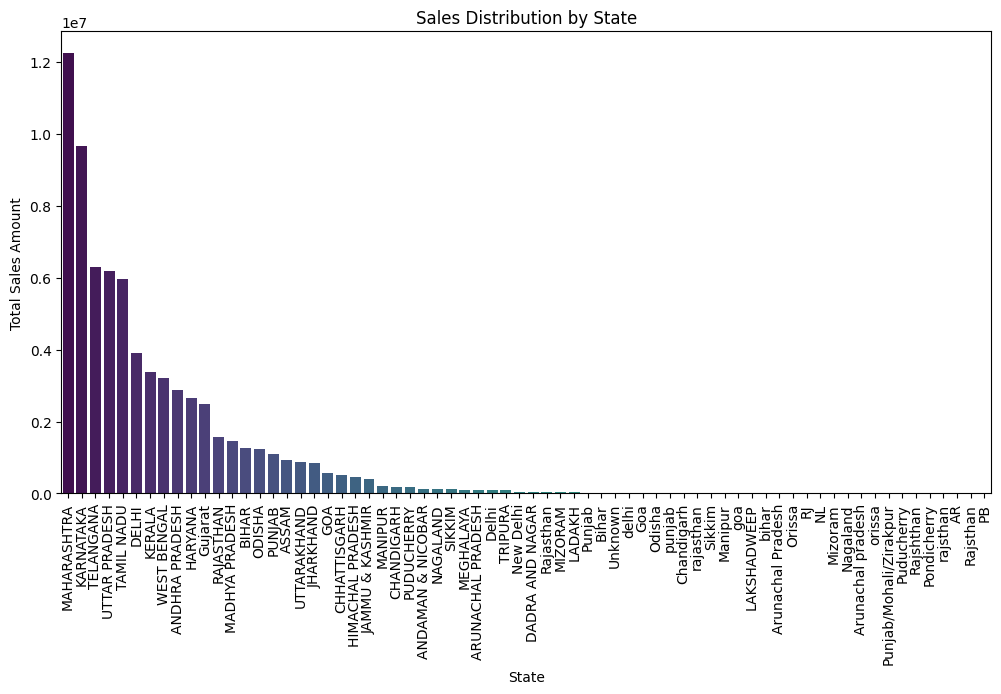

C:\Users\mryad\AppData\Local\Temp\ipykernel_30172\2657842276.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='viridis')


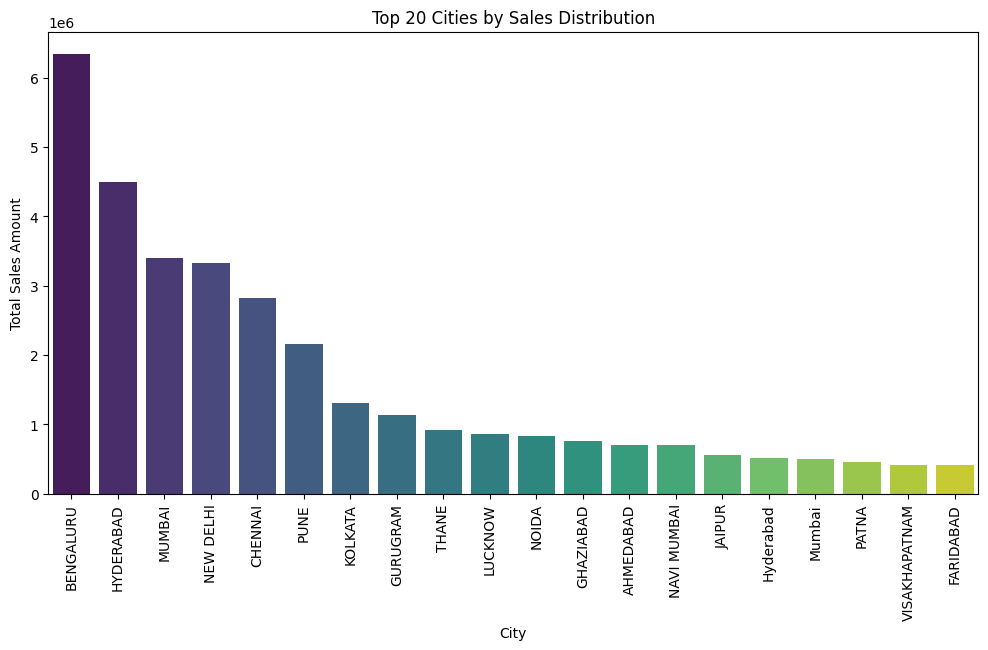

In [12]:
# Sales by State
sales_by_state = df_cleaned.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_state.index, y=sales_by_state.values, palette='viridis')
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.show()

# Sales by City
sales_by_city = df_cleaned.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='viridis')
plt.title('Top 20 Cities by Sales Distribution')
plt.xlabel('City')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.show()


In [13]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'cleaned_amazon_sales_report.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to cleaned_amazon_sales_report.csv


In [15]:
# Print current working directory
import os
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

# Check if the cleaned file exists
file_exists = os.path.isfile(cleaned_file_path)
print(f"Does the cleaned file exist? {'Yes' if file_exists else 'No'}")

Current working directory: c:\Users\mryad\AppData\Local\Programs\Microsoft VS Code
Does the cleaned file exist? Yes
